<a href="https://colab.research.google.com/github/benasphy/Naive-bayes/blob/main/Naive_bayes_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 100.00%
Prediction for [5.1 3.5]: Class 0 (setosa)


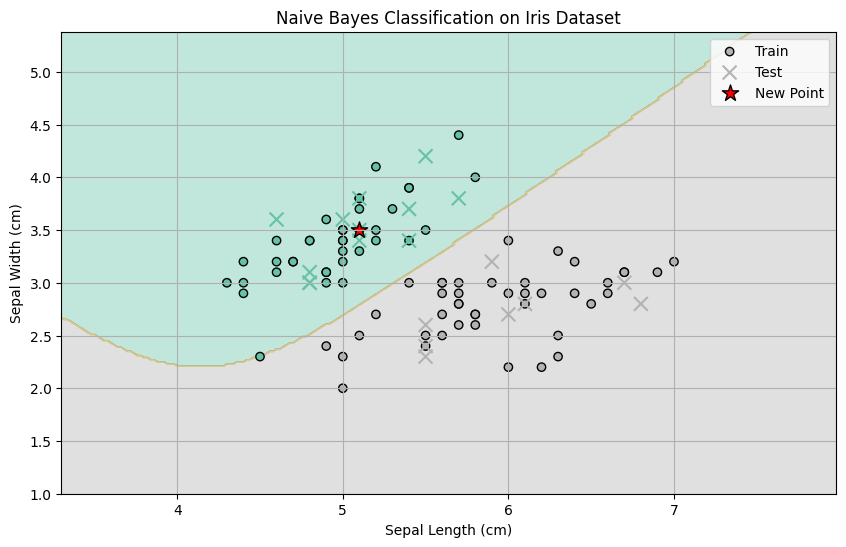

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# === 1. Load and Preprocess ===
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only use sepal length and width
y = iris.target

# Only use Setosa (0) and Versicolor (1)
X = X[y != 2]
y = y[y != 2]
target_names = iris.target_names[:2]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. Naive Bayes Classifier ===
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for cls in self.classes:
            X_c = X[y == cls]
            self.mean[cls] = X_c.mean(axis=0)
            self.var[cls] = X_c.var(axis=0)
            self.priors[cls] = X_c.shape[0] / float(X.shape[0])

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        posteriors = []

        for cls in self.classes:
            prior = np.log(self.priors[cls])
            class_conditional = np.sum(self._log_gaussian_density(cls, x))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def _log_gaussian_density(self, cls, x):
        mean = self.mean[cls]
        var = self.var[cls]
        return -0.5 * np.log(2 * np.pi * var) - ((x - mean) ** 2) / (2 * var)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

# === 3. Train and Predict ===
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = nb.accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# === 4. Predict Example ===
new_point = np.array([[5.1, 3.5]])
predicted_class = nb.predict(new_point)[0]
print(f"Prediction for {new_point[0]}: Class {predicted_class} ({target_names[predicted_class]})")

# === 5. Visualize Decision Boundary ===
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = nb.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Set2')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', label='Train', cmap='Set2')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', s=100, label='Test', cmap='Set2')
plt.scatter(new_point[0][0], new_point[0][1], c='red', edgecolor='black', s=150, label='New Point', marker='*')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Naive Bayes Classification on Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()
